**Liver Patient prediction using Random Forest ensemble learning algorithm.**

In [0]:
#Loading the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

In [0]:
class Preprocess(object):
  def __init__(self):
    self.url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00225/Indian%20Liver%20Patient%20Dataset%20(ILPD).csv"
    self.cols = ['age','gender','TB','DB','alkphos','sgpt','sgot','TP','albumin','AG_ratio','Is_liverPatient']
    self.dataset = None
  
  def load_data(self):
    self.dataset = pd.read_csv(self.url,names=self.cols)
    print('shape of df :',self.dataset.shape)
    return self.dataset
  
  def preprocess(self,data):
    #preprocessing the data
    # 1. Removing the duplicate rows
    self.dataset = data.drop_duplicates()
    print('Shape after removing the duplicates :',self.dataset.shape)
    # checking for the Null values, #display no of null values by column
    print(self.dataset.isnull().sum())
    #dropping the 4 rows here
    self.dataset = self.dataset[pd.notnull(self.dataset['AG_ratio'])]
    return None
  
  def encode_label(self):
    #changing the gender attribute to categorical type
    # 0 is for 'Female' and 1 for 'Male
    self.dataset['gender'] = self.dataset['gender'].apply(lambda x: 0 if(x == 'Female') else 1)
    #self.dataset.gender = pd.factorize(self.dataset.gender)[0] + 0.0
    #Encoding the label for proper implementation in network (1 neuron in the output layer)
    # Label 1 means "a liver patient" so encoding as 1
    # Label 2 means "not a liver patient" so encoding as 0
    self.dataset['Is_liverPatient'] = self.dataset['Is_liverPatient'].apply(lambda x: 0 if(x == 2) else x)
    #self.dataset.loc[(self.dataset.Is_liverPatient == 2), 'Is_liverPatient'] = 0
    return None
  
  def scaleData(self):
    #Scaling the attribute values to be between [0,1]
    scaler = MinMaxScaler()
    cols_to_scale = ['age', 'TB', 'DB', 'alkphos', 'sgpt', 'sgot', 'TP', 'albumin', 'AG_ratio']
    Dataset = pd.DataFrame(data=self.dataset)
    self.dataset[cols_to_scale] = scaler.fit_transform(Dataset[cols_to_scale])
    return None
  
  def get_dataset(self):
    return self.dataset

In [5]:
prep = Preprocess()
dataset = prep.load_data()
prep.preprocess(dataset)
prep.encode_label()
dataset = prep.get_dataset()

shape of df : (583, 11)
Shape after removing the duplicates : (570, 11)
age                0
gender             0
TB                 0
DB                 0
alkphos            0
sgpt               0
sgot               0
TP                 0
albumin            0
AG_ratio           4
Is_liverPatient    0
dtype: int64


In [6]:
dataset

,age,gender,TB,DB,alkphos,sgpt,sgot,TP,albumin,AG_ratio,Is_liverPatient
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [0]:
#Splitting the dataset into train and test splits
# Taking the label out of the original preprocessed dataset
X = dataset[['age', 'gender', 'TB', 'DB', 'alkphos', 'sgpt', 'sgot', 'TP', 'albumin', 'AG_ratio']]
y = dataset['Is_liverPatient']

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.70)  #test_size = 1-0.7 = 0.3

**Building the RandomForest classifier.**

In [0]:
clf=RandomForestClassifier(n_estimators=50,max_depth=5)

In [10]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred=clf.predict(X_test)

In [12]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.711764705882353


Accuracy obtained without feature selection with the parameters : 
n_estimators = 50 and max_depth = 5.
**Accuracy: 0.711764705882353**

**Finding the important features.**

In [18]:
#Finding the correlation between the columns: pd.corr()
dataset.columns
db = pd.Series(dataset['DB'])
tb = pd.Series(dataset['TB'])
print('correlation between DB and TB')
db.corr(tb)

correlation between DB and TB


0.8739748759265931

In [26]:
print('correlation between Direct_bilrubin and total_bilrubin')
print(pd.Series(data=dataset['DB']).corr(pd.Series(data=dataset['TB'])))
print('correlation between aspartate_aminotransferase and alamine_aminotransferase')
print(pd.Series(data=dataset['sgpt']).corr(pd.Series(data=dataset['sgot'])))
print('correlation between albumin and total_protiens')
print(pd.Series(data=dataset['TP']).corr(pd.Series(data=dataset['albumin'])))
print('correlation between ratio_albumin_and_globulin_ratio and albumin')
print(pd.Series(data=dataset['AG_ratio']).corr(pd.Series(data=dataset['albumin'])))

correlation between Direct_bilrubin and total_bilrubin
0.8739748759265931
correlation between aspartate_aminotransferase and alamine_aminotransferase
0.7917541284535163
correlation between albumin and total_protiens
0.7838004937512311
correlation between ratio_albumin_and_globulin_ratio and albumin
0.6874377958395209


Better to delete some of them now. Because of the high correlation the other attribute correlated strongly together is redundant in explaining the model. We just need one of them..
Removing 'DB'-“direct_bilirubin” and “total_bilirubin”.
Removing 'sgpt “aspartate_aminotransferase” (well, random choice).
Remove “albumin” (to keep more columns (“total_protiens”, “ratio_albumin_and_globulin_ratio”)).

In [0]:
x = dataset[['age', 'gender', 'TB', 'alkphos', 'sgot', 'TP','AG_ratio']]
y = dataset['Is_liverPatient']

In [0]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=5)

In [0]:
clf_1 = RandomForestClassifier(n_estimators=50,max_depth=5)

In [30]:
clf_1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred = clf_1.predict(X_test)

In [32]:
accuracy_score(y_test,y_pred)

0.711764705882353

The accuracy score after removing one of the features that were strongly correlated amongst themselves.
**Accuracy :- 0.711764705882353**

**Selecting the Features using the feature_importance_ property.**

In [34]:
feature_imp = pd.Series(clf.feature_importances_,index=dataset.columns[:-1]).sort_values(ascending=False)
feature_imp

alkphos     0.159913
sgot        0.152174
age         0.137992
TB          0.132919
sgpt        0.117005
DB          0.111638
albumin     0.076041
TP          0.059068
AG_ratio    0.048074
gender      0.005176
dtype: float64

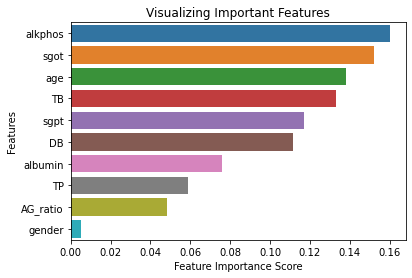

In [35]:
%matplotlib inline
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

Generating the model on the selected features, removing the gender and AG_ratio features.

In [0]:
x_FS = dataset[['age', 'TB', 'alkphos', 'sgot', 'TP', 'AG_ratio']]
y_FS = dataset['Is_liverPatient']

In [0]:
X_train_FS,X_test_FS,y_train_FS,y_test_FS=train_test_split(x_FS,y_FS,test_size=0.30,random_state=42)

In [57]:
FS_clf = RandomForestClassifier(n_estimators=10,max_depth=5)
FS_clf.fit(X_train_FS,y_train_FS)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred_FS = FS_clf.predict(X_test_FS)

In [59]:
print("Accuracy:",accuracy_score(y_test_FS, y_pred_FS))

Accuracy: 0.6705882352941176


The accuracy score after removing one of the features that were strongly correlated amongst themselves and the least important feature - gender.
**Accuracy :- 0.6705882352941176**

**Hyperparameter Tuning With Grid Search**

In [0]:
gridsearch_forest = RandomForestClassifier()

In [74]:
params = {
    "n_estimators": [50, 10, 100],
    "max_depth": [5,10,20],
    "min_samples_leaf" : [10, 1, 5],
    "criterion" : ['gini','entropy']
}

clf = GridSearchCV(gridsearch_forest, param_grid=params, cv=5 )
clf.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [75]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [76]:
clf.best_score_

0.7102623816177612

In [72]:
#lets try these parameters
#'max_depth': 15, 'min_samples_leaf': 1, 'n_estimators': 100
new_clf = RandomForestClassifier(max_depth=10,n_estimators=50,min_samples_leaf=10,criterion='gini')
new_clf.fit(X_train,y_train)
y_predict = new_clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_predict))

Accuracy: 0.7235294117647059


Final highest accuracy achieved : **Accuracy :- 0.7294117647058823 ~ 73%**